# Credit card fraud detection, from Kaggle datasets

The data are anonymized credit card transaction data containing 492 fraudulent transaction out of 284,807 transaction total. The data comes from european customers, from two days in September, 2013.

The problem here is to devise a model predicting if a transaction is fraudulent, given a fixed precision and recall. That seems to be a good problem for optimizing hyperparameters but, let's first explore the data.

**Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi.** *Calibrating Probability with Undersampling for Unbalanced Classification*. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Get the data

load, summary stat, value counts, plot histograms

In [2]:
import os

DATA_PATH = 'dataset/'

def load_fraud_data(data_path=DATA_PATH):
    """
    Load anonymized credit card data containing fraudulent transactions.
    Open data from Kaggle "Credit Card Fraud Detection", 
    see kaggle.com/dalpozz/creditcardfraud for more information.
    """
    
    csv_path = os.path.join(data_path, "creditcard.csv")
    return pd.read_csv(csv_path)

creditcard = load_fraud_data()
creditcard.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# information about the data
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


[]

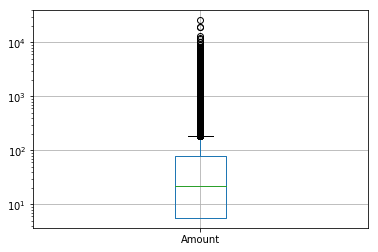

In [5]:
ax = creditcard.boxplot(["Amount"])
ax.semilogy()

In [6]:

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(creditcard, creditcard["Class"]):
    strat_cc_train = creditcard.loc[train_idx]
    strat_cc_test = creditcard.loc[test_idx]


In [7]:
strat_cc_test["Class"].value_counts() / len(strat_cc_test)

0    0.99828
1    0.00172
Name: Class, dtype: float64

In [8]:
cc = strat_cc_train.copy()

In [9]:
cc.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
233802,147710.0,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,...,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99,0
85418,60764.0,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,...,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99,0
29062,35301.0,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,...,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42,0
13766,24413.0,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,...,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,0.89,0
17677,28847.0,-0.598120,0.775041,1.823394,0.312991,-0.096171,-0.391452,0.499351,0.071224,-0.017496,...,0.060615,0.568083,-0.084001,0.685003,-0.245859,0.356638,0.378580,0.206366,6.99,0


In [10]:
cc[cc['Class'] == 1].head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42887,41285.0,-12.835760,6.574615,-12.788462,8.786257,-10.723121,-2.813536,-14.248847,7.960521,-7.718751,...,2.679490,-0.047335,-0.836982,0.625349,0.125865,0.177624,-0.817680,-0.521030,37.32,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
88897,62341.0,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,...,0.764266,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,1.10,1
74794,55760.0,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,0.887673,...,1.101671,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285,311.91,1
107067,70270.0,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,...,0.729828,0.485286,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,318.11,1


In [11]:
y_train = strat_cc_train['Class']
x_train = strat_cc_train.drop(['Class', 'Time'], axis=1)

In [12]:
x_test = strat_cc_test.drop(['Class', 'Time'], axis=1)
y_test = strat_cc_test['Class']

## First Model: Logistic Regression with stochastic gradient classifier

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, loss='log')
sgd_clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train, y_train, cv=5, scoring="roc_auc")

array([ 0.97506281,  0.98786491,  0.98104716,  0.97383345,  0.98671475])

The AUC score gives a more informative score than precision for the case of strong imbalance. However, other scoring metrics may be even better.

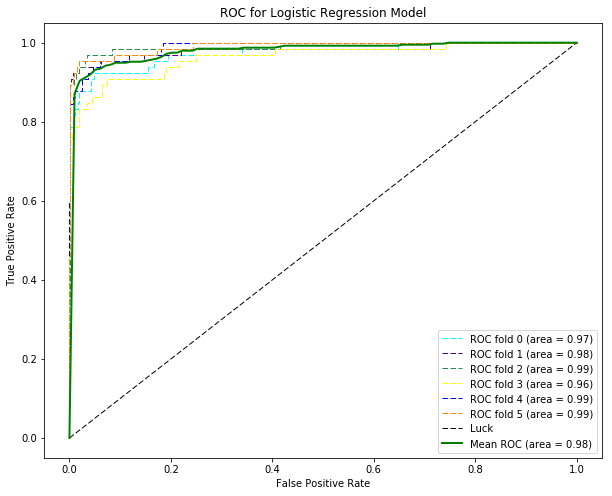

In [16]:
# Adapted from sklearn documentation: Receiver Operating Characteristic (ROC) with cross validation
# by Sci-kit learn developpers, under BSD license

from scipy import interp
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 1

i = 0

plt.figure(figsize=(10, 8))

for (train, test), color in zip(cv.split(x_train, y_train), colors):
    # Compute decision function for this fold
    scores_ = sgd_clf.fit(x_train[train], y_train.iloc[train]).decision_function(x_train[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], scores_)
    # Not sure that this would work for precision recall curve (or only with NN interpolation)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--', lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

# For a production model, it would really just be the mean that we'd be interested to know
mean_tpr /= cv.get_n_splits(x_train, y_train)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
lw = 2
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='-',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression Model')
plt.legend(loc="lower right")

In [17]:
from sklearn.model_selection import cross_val_predict

response = cross_val_predict(sgd_clf, x_train, y_train, cv=6)

In [18]:
from sklearn.metrics import roc_curve

y_scores = sgd_clf.decision_function(x_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

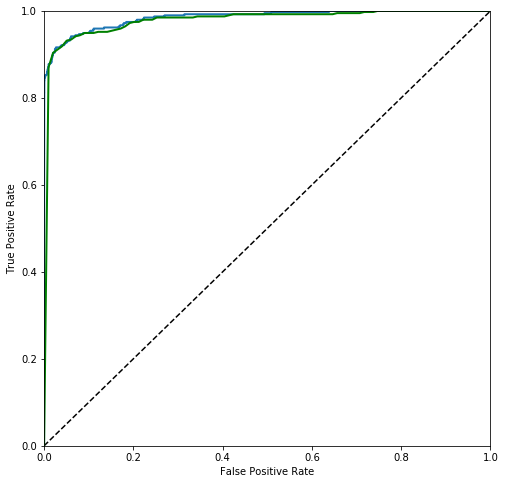

In [19]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='-', label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

The mean ROC of cross-validated models seems similar to the "one-shot" model trained with the whole training dataset, this is not expected to be the case for more complicated models that have possibly less bias.

In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

from scipy.interpolate import interp1d

def plot_cross_validated_PR_curve(clf, x_train, y_train, n_splits=5, model_name='Logistic Regression'):
    """
    Run classifier with cross-validation and plot Precision-Recall curves
    """
    cv = StratifiedKFold(n_splits=n_splits)

    mean_precision, mean_f1 = 0.0, 0.0
    mean_recall = np.linspace(0, 1, 100)

    colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
    lw = 1

    i = 0

    plt.figure(figsize=(10, 8))

    for (train, test), color in zip(cv.split(x_train, y_train), colors):
        # Compute decision function for this fold
        try:
            scores_ = clf.fit(x_train[train], y_train.iloc[train]).decision_function(x_train[test])
        except:
            scores_ = clf.fit(x_train[train], y_train.iloc[train]).predict_proba(x_train[test])[:, 1]
        # Compute ROC curve and area the curve
        precisions, recalls, thresholds = precision_recall_curve(y_train.iloc[test], scores_)
        # Not sure that this would work for precision recall curve (or only with NN interpolation)
        mean_precision += interp1d(recalls, precisions, kind='zero')(mean_recall)
        mean_precision[0] = 1.0
        f1_scoring = f1_score(y_train.iloc[train], clf.predict(x_train[train]))
        mean_f1 += f1_scoring
        plt.plot(recalls, precisions, linestyle='--', lw=lw, color=color,
                 label='PR fold %d (F1 = %0.2f)' % (i, f1_scoring))

        i += 1
    
    # For a production model, it would really just be the mean that we'd be interested to know
    mean_precision /= cv.get_n_splits(x_train, y_train)
    mean_precision[0] = 1.0
    mean_recall[-1] = 1.0
    mean_f1 /= cv.get_n_splits(x_train, y_train)
    lw = 2
    plt.plot(mean_recall, mean_precision, color='g', linestyle='-',
             label='Mean PR (F1 = %0.2f)' % mean_f1, lw=lw)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    title = 'Precision-Recall for ' + model_name + ' Model'
    plt.title(title)
    plt.legend(loc="lower left")
    
    return mean_recall, mean_precision, mean_f1

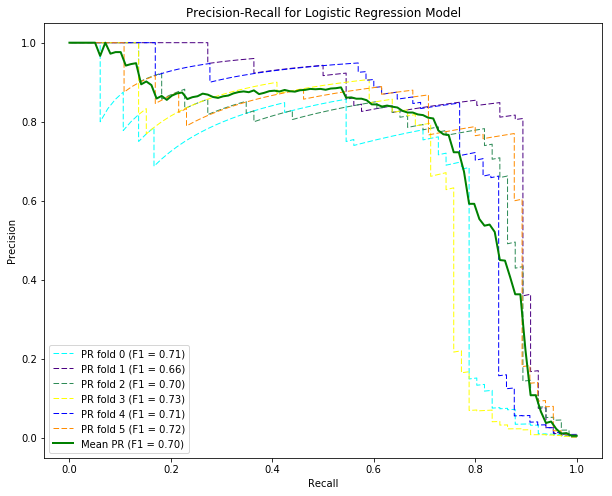

In [21]:
recalls, precisions, f1_scoring = plot_cross_validated_PR_curve(sgd_clf, x_train, y_train, n_splits=6)

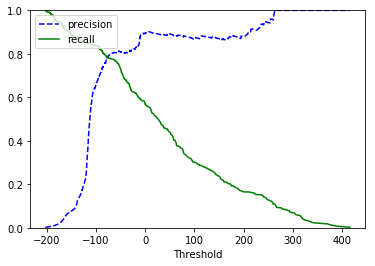

In [20]:
# Make a function for precision recall curve plotting

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

precision-recall curves allow for better interpretation of model efficiency. Here a high recall means that not too many fraudulent transactions are detected: at the threshold 0 here, recall is a little above 50%, but remember that the rate of fraudulent transaction is a very very low number. In the same way a high precision would mean that only a few fraudulent transactions are left undetected.

However, it is not possible to have it both ways, increasing precision will necessarily decrease recall, as the curve below shows.

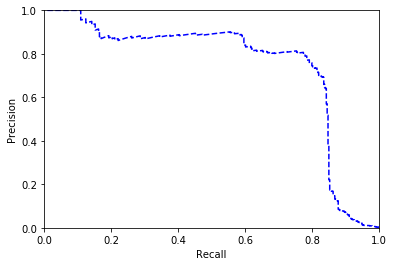

In [21]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b--")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.xlim([0, 1])
    plt.ylim([0, 1])

plot_precision_vs_recall(precisions, recalls)

## Second model: ADABoost Ensemble learning

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [28]:
adaboost_clf = AdaBoostClassifier(n_estimators=50)
adaboost_clf.fit(x_train, y_train)
cross_val_score(adaboost_clf, x_train, y_train, cv=5, scoring="f1")

array([ 0.69565217,  0.79220779,  0.79166667,  0.76388889,  0.78378378])

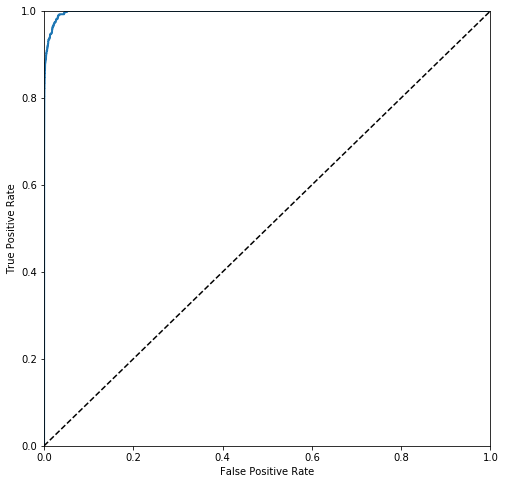

In [23]:
y_scores = adaboost_clf.decision_function(x_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr, tpr)

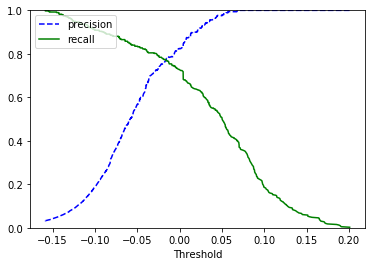

In [25]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

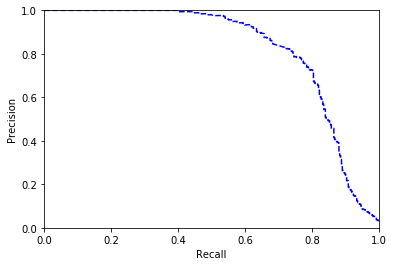

In [27]:
plot_precision_vs_recall(precisions, recalls)

Now it is visible that ADABoost does a much better job at discriminating fraudulent transactions from legit ones. The recall starts falling down fast only for a little less that 80% precision. This means that the ADAboost model is much more efficient than Logistic regression, for this case.

It should be noted however, that this distinction, although visible is less sensible for the AUC scoring. That makes the F1 score a somewhat better metric than AUC. I think it will be good to move on to using F1 score instead of AUC for now on for this problem. 

Next we'll train another AdaBoost classifier, with however less stump trees allowed to vote. It is expected that the F1 score should be sensitive to that parameter, and we want to see how much. It will then be used to optimize hyperparameters, before moving on to random forests classifier.

In [24]:
adaboost_clf_n20 = AdaBoostClassifier(n_estimators=20)
adaboost_clf_n20.fit(x_train, y_train)
cross_val_score(adaboost_clf_n20, x_train, y_train, cv=5, scoring="f1")

array([ 0.63703704,  0.77419355,  0.74285714,  0.75167785,  0.74482759])

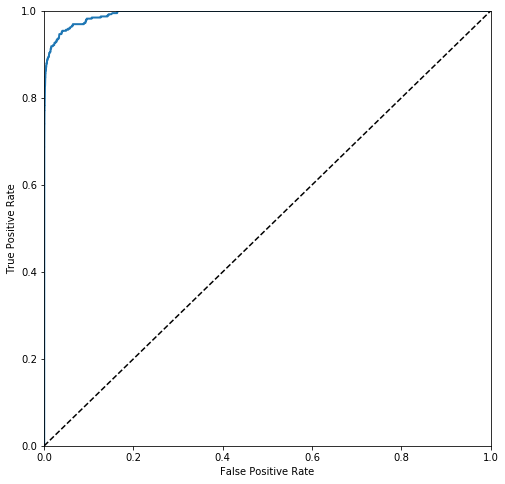

In [25]:
y_scores = adaboost_clf_n20.decision_function(x_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr, tpr)

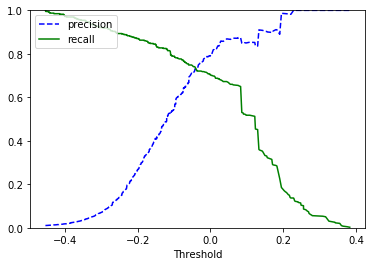

In [26]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

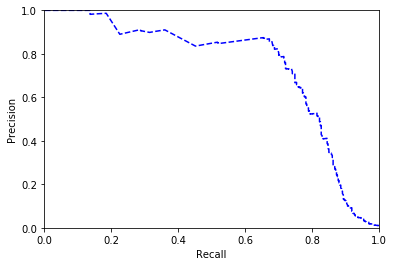

In [27]:
plot_precision_vs_recall(precisions, recalls)

The curve is quite more raggedy. This is probably because the committee of weak model is not large enough to capture fine grained features in the feature space, very likely because there are so few positive cases.

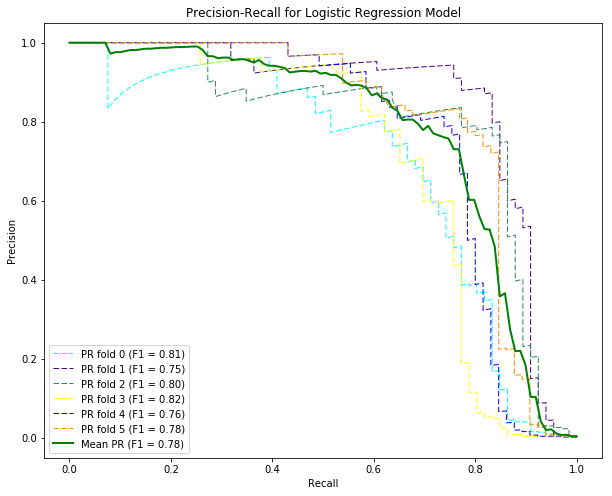

In [31]:
adaboost_clf = AdaBoostClassifier(n_estimators=50)
recs, precs, ada_f1Scoring = plot_cross_validated_PR_curve(adaboost_clf, x_train, y_train, n_splits=6, 
                                                          model_name='ADABoost')

In [34]:
print('Cross-validated {0} Accuracy : {1}'.format('ADABoost', ada_f1Scoring))

Cross-validated ADABoost Accuracy : 0.784244790057


## Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf_class_n_10 = RandomForestClassifier(n_estimators=10, criterion='gini')
rf_class_n_10.fit(x_train, y_train)
cross_val_score(rf_class_n_10, x_train, y_train, cv=5, scoring='f1')

array([ 0.8       ,  0.84137931,  0.84137931,  0.83687943,  0.81751825])

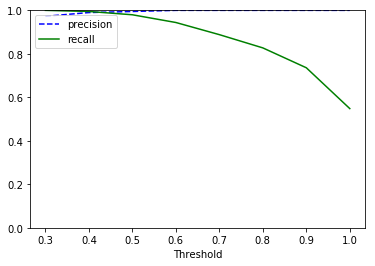

In [34]:
# compute random forest probabilities estimations
y_probas = rf_class_n_10.predict_proba(x_train)
y_scores = y_probas[:, 1]

# plot precision and recall evolution with threshold
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Strange that the precision does only go up, and seems stuck at this very high value, I would have expected a more nuanced variation, now I am suspecting overfitting. It seems fair to check the score value that is expected in the ```precision_recall_curve()``` function. 

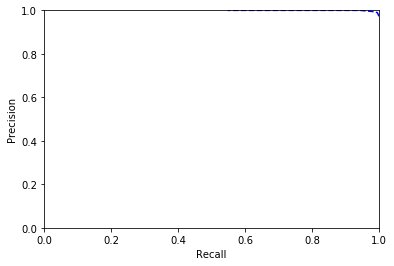

In [35]:
plot_precision_vs_recall(precisions, recalls)

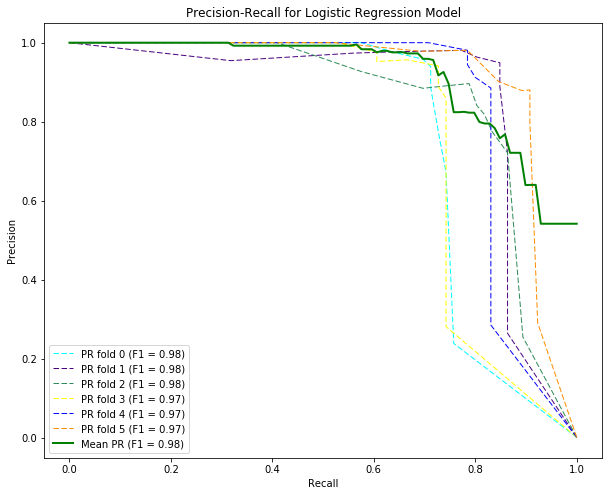

In [27]:
rf_class_n_10 = RandomForestClassifier(n_estimators=10, criterion='gini')
recalls, precisions, f1_scoring = plot_cross_validated_PR_curve(rf_class_n_10, x_train, y_train, n_splits=6,
                                                               model_name='Random Forest')

In [28]:
print("Mean F1 : {0}".format(f1_scoring))

Mean F1 : 0.975070257068


The F1 score is very good, and this should validate Random Forest as the primary choice for this problem, at least among the limited span of models used so far. However, this is not the end, since the model must be tuned so that to maximize the F1-score, for that we will use global optimization technique, and sci-kit optimize.

# Using global optimization to optimize a random forest model for credit-card fraud detection

In [62]:
n_features = x_train.shape[1]

clf = RandomForestClassifier(random_state=0)

def objective(params):
    """
    Estimate the average cross-validation score for global minimization
    """
    # Want to optimize n_estimators, max_features and max_depth parameters
    max_features = params[0]
    print(max_features)
    # set parameters
    clf.set_params(n_estimators=10,
                   max_features=max_features)

    return 1 - np.mean(cross_val_score(clf, x_train, y_train, cv=5, n_jobs=-1, scoring="f1"))

In [63]:
# set the parameter space to search into
space = [(1, n_features)] # max_features

In [64]:
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=10, random_state=0)

print("Best score = {0}".format(res_gp.fun))

13
16
22
1
4
28
4
8
10
20
Best score = 0.160686622849


In [65]:
print("Best x (x*)={0}".format(res_gp.x[0]))

Best x (x*)=13


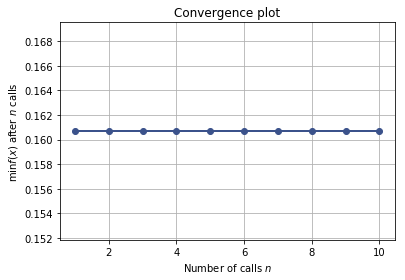

In [66]:
from skopt.plots import plot_convergence
plot_convergence(res_gp)